In [91]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [38]:
student_data =  pd.read_csv('student_data.csv')

In [39]:
student_data

,Student Age,Student Attendance,Student Test Marks,Student Percentage in Final Exam
0,24,57,61,52.82
1,21,63,74,58.53
2,22,72,91,73.92
3,24,89,88,83.40
4,20,70,61,49.88
...,...,...,...,...
95,23,77,30,40.31
96,21,93,93,79.64
97,23,93,41,45.26
98,24,69,98,67.48


In [40]:
X = student_data[['Student Age', 'Student Attendance' , 'Student Test Marks' ]]
y = student_data['Student Percentage in Final Exam']

In [41]:
param_grid = {
    'n_estimators' : [50,100,200], 
    'max_depth' : [2,4,6,8] , 
    'min_samples_split' : [2,5] , 
    'min_samples_leaf' : [1,2]
}

In [42]:
param_grid

{'n_estimators': [50, 100, 200],
 'max_depth': [2, 4, 6, 8],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2]}

In [43]:
rf= RandomForestRegressor(random_state = 42)

In [44]:
grid_search = GridSearchCV(
    estimator=rf,  
    param_grid=param_grid,  
    cv=KFold(n_splits=10, shuffle=True, random_state=42),   
    scoring='neg_mean_squared_error',  
    n_jobs=-1  
)

In [45]:
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Hyper Parameters :" , grid_search.best_params_)

In [ ]:
print("Best MSE : " , -grid_search.best_score_)

In [ ]:
best_rf = grid_search.best_estimator_

In [69]:
student_data

,Student Age,Student Attendance,Student Test Marks,Student Percentage in Final Exam
0,24,57,61,52.82
1,21,63,74,58.53
2,22,72,91,73.92
3,24,89,88,83.40
4,20,70,61,49.88
...,...,...,...,...
95,23,77,30,40.31
96,21,93,93,79.64
97,23,93,41,45.26
98,24,69,98,67.48


In [70]:
best_rf.fit(X,y)
example_data = pd.DataFrame({
    'Student Age' : [20], 
    'Student Attendance' : [85] , 
    'Student Test Marks' : [75]
})

In [71]:
example_data

,Student Age,Student Attendance,Student Test Marks
0,20,85,75


In [72]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

for train_idx, val_idx in cv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse) 

In [73]:
for i, mae in enumerate(mse_scores, 1):
    print(f"Fold {i}: MSE = {mae:.4f}")

Fold 1: MSE = 26.4592
Fold 2: MSE = 26.6085
Fold 3: MSE = 14.2017
Fold 4: MSE = 27.6086
Fold 5: MSE = 32.3516
Fold 6: MSE = 45.4103
Fold 7: MSE = 39.6078
Fold 8: MSE = 23.8195
Fold 9: MSE = 30.6074
Fold 10: MSE = 37.7655


In [74]:
predicted_score = best_rf.predict(example_data)
print("Predicted Student Percentage in Final Exam:", predicted_score[0])

Predicted Student Percentage in Final Exam: 59.89681880952379


In [75]:
correlation_matrix = X.corrwith(y)
print("Correlation of Features with Target Variable (y):\n", correlation_matrix)

Correlation of Features with Target Variable (y):
 Student Age          -0.019672
Student Attendance    0.189582
Student Test Marks    0.931060
dtype: float64


In [76]:
def pearson_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2)) * np.sqrt(np.sum((y - y_mean) ** 2))
    return numerator / denominator

In [77]:
correlation_values = {}


In [78]:
for column in X.columns:
    correlation_values[column] = pearson_correlation(X[column], y)


In [79]:

print("Correlation of Features with Target Variable (y):")

Correlation of Features with Target Variable (y):


In [80]:
for feature, corr in correlation_values.items():
    print(f"{feature}: {corr:.4f}")

Student Age: -0.0197
Student Attendance: 0.1896
Student Test Marks: 0.9311


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=42)

In [89]:
y_pred = rf.predict(X_test)

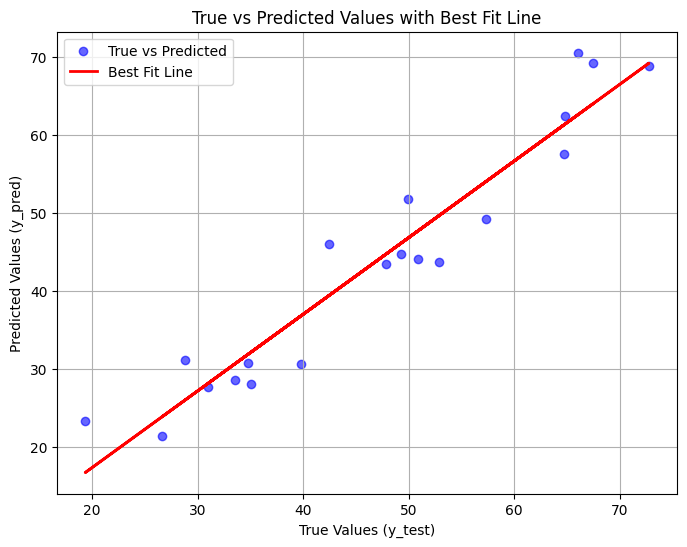

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="True vs Predicted")
reg = LinearRegression()
reg.fit(y_test.values.reshape(-1, 1), y_pred) 
y_fit = reg.predict(y_test.values.reshape(-1, 1)) 


plt.plot(y_test, y_fit, color='red', linewidth=2, label="Best Fit Line")

plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True vs Predicted Values with Best Fit Line")
plt.legend()
plt.grid(True)
plt.show()